In [1]:
from sklearn.linear_model import Perceptron
# 샘플과 레이블이다. 
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0, 0, 1]
# 퍼셉트론을 생성한다. tol는 종료 조건이다. random_state는 난수의시드이다. 
clf = Perceptron(tol=1e-3, random_state=0)
# 학습을 수행한다. 
clf.fit(X, y)
# 테스트를 수행한다
print(clf.predict(X))

[0 0 0 1]


In [2]:
x = 10
learning_rate = 0.01
precision = 0.00001
max_iterations = 100
# 손실 함수를 람다식으로 정의한다. 
loss_func = lambda x: (x-3)**2 + 10
# 그래디언트를 람다식으로 정의한다. 손실 함수의 1차 미분값이다. 
gradient = lambda x: 2*x-6
# 그래디언트 강하법
for i in range(max_iterations):
    x = x - learning_rate * gradient(x)
    print("손실 함수값(", x, ")=", loss_func(x))
    print("최소값 = ", x)

손실 함수값( 9.86 )= 57.05959999999999
최소값 =  9.86
손실 함수값( 9.7228 )= 55.19603983999999
최소값 =  9.7228
손실 함수값( 9.588344 )= 53.40627666233599
최소값 =  9.588344
손실 함수값( 9.456577119999999 )= 51.68738810650748
최소값 =  9.456577119999999
손실 함수값( 9.327445577599999 )= 50.03656753748979
최소값 =  9.327445577599999
손실 함수값( 9.200896666048 )= 48.45111946300519
최소값 =  9.200896666048
손실 함수값( 9.076878732727039 )= 46.92845513227018
최소값 =  9.076878732727039
손실 함수값( 8.955341158072498 )= 45.46608830903228
최소값 =  8.955341158072498
손실 함수값( 8.836234334911047 )= 44.061631211994595
최소값 =  8.836234334911047
손실 함수값( 8.719509648212826 )= 42.7127906159996
최소값 =  8.719509648212826
손실 함수값( 8.60511945524857 )= 41.41736410760602
최소값 =  8.60511945524857
손실 함수값( 8.493017066143599 )= 40.17323648894484
최소값 =  8.493017066143599
손실 함수값( 8.383156724820727 )= 38.97837632398262
최소값 =  8.383156724820727
손실 함수값( 8.275493590324313 )= 37.830832621552915
최소값 =  8.275493590324313
손실 함수값( 8.169983718517827 )= 36.728731649739416
최소값 =  8.16998371

**MNIST VALIDATION**

In [10]:
import tensorflow as tf
batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10 # 출력 클래스의 개수
epochs = 1000 # 에포크의 개수
# 데이터를 학습 데이터와 테스트 데이터로 나눈다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 입력 이미지를 2차원에서 1차원 벡터로 변경한다. 
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다. 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [4]:
# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다. 
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다. 
y_train = tf.keras.utils.to_categorical(y_train, num_classes) # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes) # One-hot encoding
# 신경망의 모델을 구축한다. 
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,))) 
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid')) 
model.summary() 
sgd = tf.keras.optimizers.SGD(lr=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다. 
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# 학습을 수행한다. 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
# 학습을 평가한다. 
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

Epoch 1/1000
469/469 [==============================] - 3s 5ms/step - loss: 0.1679 - accuracy: 0.2061 - val_loss: 0.0916 - val_accuracy: 0.3949
Epoch 2/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0894 - accuracy: 0.4417 - val_loss: 0.0839 - val_accuracy: 0.5345
Epoch 3/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0829 - accuracy: 0.5474 - val_loss: 0.0794 - val_accuracy: 0.5743
Epoch 4/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0785 - accuracy: 0.5837 - val_loss: 0.0750 - val_accuracy: 0.6053
Epoch 5/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0743 - accuracy: 0.6130 - val_loss: 0.0708 - val_accuracy: 0.6349
Epoch 6/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.6348 - val_loss: 0.0669 - val_accuracy: 0.6610
Epoch 7/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0666 - accuracy: 0.6604 - val_loss: 0.0632 - val_accuracy:

469/469 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.8795 - val_loss: 0.0245 - val_accuracy: 0.8877
Epoch 58/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.8797 - val_loss: 0.0244 - val_accuracy: 0.8889
Epoch 59/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.8826 - val_loss: 0.0242 - val_accuracy: 0.8892
Epoch 60/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.8823 - val_loss: 0.0240 - val_accuracy: 0.8900
Epoch 61/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.8826 - val_loss: 0.0239 - val_accuracy: 0.8903
Epoch 62/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0248 - accuracy: 0.8831 - val_loss: 0.0237 - val_accuracy: 0.8907
Epoch 63/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.8816 - val_loss: 0.0236 - val_accuracy: 0.8911

469/469 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9008 - val_loss: 0.0190 - val_accuracy: 0.9073
Epoch 114/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0199 - accuracy: 0.9017 - val_loss: 0.0190 - val_accuracy: 0.9076
Epoch 115/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9005 - val_loss: 0.0189 - val_accuracy: 0.9077
Epoch 116/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0198 - accuracy: 0.9027 - val_loss: 0.0189 - val_accuracy: 0.9079
Epoch 117/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0198 - accuracy: 0.9006 - val_loss: 0.0188 - val_accuracy: 0.9081
Epoch 118/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0197 - accuracy: 0.9010 - val_loss: 0.0188 - val_accuracy: 0.9083
Epoch 119/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0198 - accuracy: 0.8995 - val_loss: 0.0187 - val_accuracy: 

469/469 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9113 - val_loss: 0.0165 - val_accuracy: 0.9177
Epoch 170/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0170 - accuracy: 0.9151 - val_loss: 0.0165 - val_accuracy: 0.9182
Epoch 171/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0173 - accuracy: 0.9122 - val_loss: 0.0165 - val_accuracy: 0.9183
Epoch 172/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0173 - accuracy: 0.9116 - val_loss: 0.0164 - val_accuracy: 0.9183
Epoch 173/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0172 - accuracy: 0.9131 - val_loss: 0.0164 - val_accuracy: 0.9183
Epoch 174/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9146 - val_loss: 0.0164 - val_accuracy: 0.9186
Epoch 175/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0173 - accuracy: 0.9118 - val_loss: 0.0163 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0158 - accuracy: 0.9184 - val_loss: 0.0149 - val_accuracy: 0.9243
Epoch 226/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.9200 - val_loss: 0.0149 - val_accuracy: 0.9245
Epoch 227/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0157 - accuracy: 0.9197 - val_loss: 0.0149 - val_accuracy: 0.9246
Epoch 228/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0155 - accuracy: 0.9200 - val_loss: 0.0149 - val_accuracy: 0.9246
Epoch 229/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.9196 - val_loss: 0.0148 - val_accuracy: 0.9245
Epoch 230/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.9201 - val_loss: 0.0148 - val_accuracy: 0.9248
Epoch 231/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.9204 - val_loss: 0.0148 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9248 - val_loss: 0.0138 - val_accuracy: 0.9283
Epoch 282/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9236 - val_loss: 0.0138 - val_accuracy: 0.9285
Epoch 283/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9258 - val_loss: 0.0138 - val_accuracy: 0.9287
Epoch 284/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9244 - val_loss: 0.0137 - val_accuracy: 0.9288
Epoch 285/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9245 - val_loss: 0.0137 - val_accuracy: 0.9289
Epoch 286/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9259 - val_loss: 0.0137 - val_accuracy: 0.9289
Epoch 287/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9241 - val_loss: 0.0137 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0135 - accuracy: 0.9291 - val_loss: 0.0129 - val_accuracy: 0.9330
Epoch 338/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.9296 - val_loss: 0.0129 - val_accuracy: 0.9331
Epoch 339/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0133 - accuracy: 0.9310 - val_loss: 0.0129 - val_accuracy: 0.9327
Epoch 340/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0132 - accuracy: 0.9306 - val_loss: 0.0129 - val_accuracy: 0.9330
Epoch 341/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0134 - accuracy: 0.9297 - val_loss: 0.0128 - val_accuracy: 0.9331
Epoch 342/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0134 - accuracy: 0.9296 - val_loss: 0.0128 - val_accuracy: 0.9334
Epoch 343/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0135 - accuracy: 0.9287 - val_loss: 0.0128 - val_accuracy: 

Epoch 393/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9333 - val_loss: 0.0122 - val_accuracy: 0.9371
Epoch 394/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0126 - accuracy: 0.9331 - val_loss: 0.0122 - val_accuracy: 0.9369
Epoch 395/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9331 - val_loss: 0.0122 - val_accuracy: 0.9372
Epoch 396/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0127 - accuracy: 0.9324 - val_loss: 0.0121 - val_accuracy: 0.9371
Epoch 397/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0123 - accuracy: 0.9363 - val_loss: 0.0121 - val_accuracy: 0.9372
Epoch 398/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9342 - val_loss: 0.0121 - val_accuracy: 0.9374
Epoch 399/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0124 - accuracy: 0.9356 - val_loss: 0.0121 -

469/469 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9360 - val_loss: 0.0116 - val_accuracy: 0.9400
Epoch 450/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0118 - accuracy: 0.9376 - val_loss: 0.0116 - val_accuracy: 0.9401
Epoch 451/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0119 - accuracy: 0.9370 - val_loss: 0.0116 - val_accuracy: 0.9401
Epoch 452/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0119 - accuracy: 0.9370 - val_loss: 0.0116 - val_accuracy: 0.9401
Epoch 453/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9362 - val_loss: 0.0115 - val_accuracy: 0.9401
Epoch 454/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.9369 - val_loss: 0.0115 - val_accuracy: 0.9401
Epoch 455/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.9382 - val_loss: 0.0115 - val_accuracy: 

Epoch 505/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0115 - accuracy: 0.9396 - val_loss: 0.0111 - val_accuracy: 0.9423
Epoch 506/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0114 - accuracy: 0.9404 - val_loss: 0.0111 - val_accuracy: 0.9423
Epoch 507/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0113 - accuracy: 0.9402 - val_loss: 0.0111 - val_accuracy: 0.9424
Epoch 508/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0114 - accuracy: 0.9402 - val_loss: 0.0110 - val_accuracy: 0.9425
Epoch 509/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0114 - accuracy: 0.9395 - val_loss: 0.0110 - val_accuracy: 0.9424
Epoch 510/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0113 - accuracy: 0.9405 - val_loss: 0.0110 - val_accuracy: 0.9424
Epoch 511/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0113 - accuracy: 0.9403 - val_loss: 0.0110 -

469/469 [==============================] - 2s 3ms/step - loss: 0.0109 - accuracy: 0.9424 - val_loss: 0.0106 - val_accuracy: 0.9446
Epoch 562/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0108 - accuracy: 0.9439 - val_loss: 0.0106 - val_accuracy: 0.9446
Epoch 563/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0110 - accuracy: 0.9408 - val_loss: 0.0106 - val_accuracy: 0.9446
Epoch 564/1000
469/469 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.94 - 2s 3ms/step - loss: 0.0107 - accuracy: 0.9436 - val_loss: 0.0106 - val_accuracy: 0.9446
Epoch 565/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0111 - accuracy: 0.9409 - val_loss: 0.0106 - val_accuracy: 0.9446
Epoch 566/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0109 - accuracy: 0.9419 - val_loss: 0.0106 - val_accuracy: 0.9447
Epoch 567/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0110 - accuracy: 

Epoch 617/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0103 - accuracy: 0.9452 - val_loss: 0.0102 - val_accuracy: 0.9462
Epoch 618/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0105 - accuracy: 0.9449 - val_loss: 0.0102 - val_accuracy: 0.9463
Epoch 619/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0104 - accuracy: 0.9445 - val_loss: 0.0102 - val_accuracy: 0.9463
Epoch 620/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0104 - accuracy: 0.9458 - val_loss: 0.0102 - val_accuracy: 0.9463
Epoch 621/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0105 - accuracy: 0.9440 - val_loss: 0.0102 - val_accuracy: 0.9463
Epoch 622/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0104 - accuracy: 0.9451 - val_loss: 0.0102 - val_accuracy: 0.9464
Epoch 623/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0105 - accuracy: 0.9448 - val_loss: 0.0102 -

469/469 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9469 - val_loss: 0.0099 - val_accuracy: 0.9479
Epoch 674/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0099 - accuracy: 0.9481 - val_loss: 0.0099 - val_accuracy: 0.9479
Epoch 675/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9464 - val_loss: 0.0099 - val_accuracy: 0.9479
Epoch 676/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0100 - accuracy: 0.9482 - val_loss: 0.0099 - val_accuracy: 0.9479
Epoch 677/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9463 - val_loss: 0.0099 - val_accuracy: 0.9479
Epoch 678/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0099 - accuracy: 0.9474 - val_loss: 0.0098 - val_accuracy: 0.9480
Epoch 679/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0099 - accuracy: 0.9483 - val_loss: 0.0098 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0096 - accuracy: 0.9487 - val_loss: 0.0096 - val_accuracy: 0.9496
Epoch 730/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.9492 - val_loss: 0.0096 - val_accuracy: 0.9496
Epoch 731/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0097 - accuracy: 0.9479 - val_loss: 0.0095 - val_accuracy: 0.9496
Epoch 732/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.9487 - val_loss: 0.0095 - val_accuracy: 0.9496
Epoch 733/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9490 - val_loss: 0.0095 - val_accuracy: 0.9497
Epoch 734/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0096 - accuracy: 0.9493 - val_loss: 0.0095 - val_accuracy: 0.9497
Epoch 735/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.9495 - val_loss: 0.0095 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0094 - accuracy: 0.9497 - val_loss: 0.0093 - val_accuracy: 0.9508
Epoch 786/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0094 - accuracy: 0.9497 - val_loss: 0.0093 - val_accuracy: 0.9509
Epoch 787/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0092 - accuracy: 0.9513 - val_loss: 0.0093 - val_accuracy: 0.9510
Epoch 788/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0091 - accuracy: 0.9522 - val_loss: 0.0093 - val_accuracy: 0.9510
Epoch 789/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0095 - accuracy: 0.9499 - val_loss: 0.0092 - val_accuracy: 0.9510
Epoch 790/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0092 - accuracy: 0.9517 - val_loss: 0.0092 - val_accuracy: 0.9511
Epoch 791/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0093 - accuracy: 0.9519 - val_loss: 0.0092 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0090 - accuracy: 0.9531 - val_loss: 0.0090 - val_accuracy: 0.9520
Epoch 842/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0089 - accuracy: 0.9527 - val_loss: 0.0090 - val_accuracy: 0.9522
Epoch 843/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0092 - accuracy: 0.9510 - val_loss: 0.0090 - val_accuracy: 0.9521
Epoch 844/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0090 - accuracy: 0.9532 - val_loss: 0.0090 - val_accuracy: 0.9524
Epoch 845/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0089 - accuracy: 0.9533 - val_loss: 0.0090 - val_accuracy: 0.9525
Epoch 846/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0092 - accuracy: 0.9517 - val_loss: 0.0090 - val_accuracy: 0.9525
Epoch 847/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0091 - accuracy: 0.9521 - val_loss: 0.0090 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0087 - accuracy: 0.9539 - val_loss: 0.0088 - val_accuracy: 0.9537
Epoch 898/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9541 - val_loss: 0.0088 - val_accuracy: 0.9538
Epoch 899/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0088 - accuracy: 0.9541 - val_loss: 0.0087 - val_accuracy: 0.9537
Epoch 900/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0088 - accuracy: 0.9538 - val_loss: 0.0087 - val_accuracy: 0.9539
Epoch 901/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0087 - accuracy: 0.9545 - val_loss: 0.0087 - val_accuracy: 0.9538
Epoch 902/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0087 - accuracy: 0.9546 - val_loss: 0.0087 - val_accuracy: 0.9539
Epoch 903/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0086 - accuracy: 0.9548 - val_loss: 0.0087 - val_accuracy: 

469/469 [==============================] - 2s 3ms/step - loss: 0.0084 - accuracy: 0.9563 - val_loss: 0.0085 - val_accuracy: 0.9549
Epoch 954/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0086 - accuracy: 0.9556 - val_loss: 0.0085 - val_accuracy: 0.9549
Epoch 955/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0084 - accuracy: 0.9563 - val_loss: 0.0085 - val_accuracy: 0.9549
Epoch 956/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0084 - accuracy: 0.9567 - val_loss: 0.0085 - val_accuracy: 0.9550
Epoch 957/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.9565 - val_loss: 0.0085 - val_accuracy: 0.9550
Epoch 958/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.9567 - val_loss: 0.0085 - val_accuracy: 0.9550
Epoch 959/1000
469/469 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.9567 - val_loss: 0.0085 - val_accuracy: 

In [6]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
    metrics =  ['loss', 'accuracy']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.rcParams["figure.figsize"] = (14,4)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
    if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
        plt.ylim([0.8,1])
    else:
        plt.ylim([0,1])

    plt.legend()


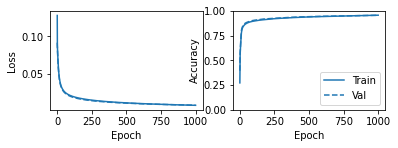

In [7]:
plot_metrics(history)

**parameter change**

In [ ]:
import tensorflow as tf
batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10 # 출력 클래스의 개수
epochs = 1000 # 에포크의 개수
# 데이터를 학습 데이터와 테스트 데이터로 나눈다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 입력 이미지를 2차원에서 1차원 벡터로 변경한다. 
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다. 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [11]:
# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다. 
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다. 
y_train = tf.keras.utils.to_categorical(y_train, num_classes) # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes) # One-hot encoding
# 신경망의 모델을 구축한다. 
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,))) 
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid')) 
model.summary() 
sgd = tf.keras.optimizers.SGD(lr=0.1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다. 
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# 학습을 수행한다. 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
# 학습을 평가한다. 
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

Epoch 1/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.1945 - accuracy: 0.1264 - val_loss: 0.0948 - val_accuracy: 0.2820
Epoch 2/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0924 - accuracy: 0.3297 - val_loss: 0.0884 - val_accuracy: 0.4110
Epoch 3/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0880 - accuracy: 0.4169 - val_loss: 0.0861 - val_accuracy: 0.4465
Epoch 4/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0856 - accuracy: 0.4555 - val_loss: 0.0836 - val_accuracy: 0.4894
Epoch 5/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0830 - accuracy: 0.4987 - val_loss: 0.0806 - val_accuracy: 0.5240
Epoch 6/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0799 - accuracy: 0.5295 - val_loss: 0.0770 - val_accuracy: 0.5515
Epoch 7/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0760 - accuracy: 0.5635 - val_loss: 0.0728 - val_accuracy:

469/469 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9035 - val_loss: 0.0178 - val_accuracy: 0.9106
Epoch 58/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9050 - val_loss: 0.0177 - val_accuracy: 0.9109
Epoch 59/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9048 - val_loss: 0.0175 - val_accuracy: 0.9122
Epoch 60/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9071 - val_loss: 0.0174 - val_accuracy: 0.9130
Epoch 61/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0180 - accuracy: 0.9090 - val_loss: 0.0172 - val_accuracy: 0.9129
Epoch 62/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0179 - accuracy: 0.9089 - val_loss: 0.0171 - val_accuracy: 0.9140
Epoch 63/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0180 - accuracy: 0.9081 - val_loss: 0.0169 - val_accuracy: 0.9138

469/469 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.9254 - val_loss: 0.0129 - val_accuracy: 0.9286
Epoch 114/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0139 - accuracy: 0.9237 - val_loss: 0.0129 - val_accuracy: 0.9288
Epoch 115/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9272 - val_loss: 0.0128 - val_accuracy: 0.9287
Epoch 116/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.0135 - accuracy: 0.9260 - val_loss: 0.0128 - val_accuracy: 0.9290
Epoch 117/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0136 - accuracy: 0.9265 - val_loss: 0.0128 - val_accuracy: 0.9292
Epoch 118/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9259 - val_loss: 0.0127 - val_accuracy: 0.9293
Epoch 119/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0131 - accuracy: 0.9289 - val_loss: 0.0127 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0114 - accuracy: 0.9364 - val_loss: 0.0109 - val_accuracy: 0.9384
Epoch 170/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0112 - accuracy: 0.9376 - val_loss: 0.0109 - val_accuracy: 0.9388
Epoch 171/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0111 - accuracy: 0.9393 - val_loss: 0.0109 - val_accuracy: 0.9380
Epoch 172/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9367 - val_loss: 0.0108 - val_accuracy: 0.9387
Epoch 173/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9375 - val_loss: 0.0108 - val_accuracy: 0.9394
Epoch 174/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9368 - val_loss: 0.0108 - val_accuracy: 0.9391
Epoch 175/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0115 - accuracy: 0.9358 - val_loss: 0.0108 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9454 - val_loss: 0.0096 - val_accuracy: 0.9449
Epoch 226/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9452 - val_loss: 0.0096 - val_accuracy: 0.9456
Epoch 227/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9459 - val_loss: 0.0096 - val_accuracy: 0.9453
Epoch 228/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0099 - accuracy: 0.9447 - val_loss: 0.0096 - val_accuracy: 0.9455
Epoch 229/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0099 - accuracy: 0.9448 - val_loss: 0.0096 - val_accuracy: 0.9456
Epoch 230/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0100 - accuracy: 0.9440 - val_loss: 0.0096 - val_accuracy: 0.9455
Epoch 231/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0098 - accuracy: 0.9447 - val_loss: 0.0095 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.9500 - val_loss: 0.0087 - val_accuracy: 0.9497
Epoch 282/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0088 - accuracy: 0.9508 - val_loss: 0.0087 - val_accuracy: 0.9501
Epoch 283/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0085 - accuracy: 0.9527 - val_loss: 0.0087 - val_accuracy: 0.9500
Epoch 284/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0087 - accuracy: 0.9515 - val_loss: 0.0087 - val_accuracy: 0.9498
Epoch 285/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0087 - accuracy: 0.9508 - val_loss: 0.0087 - val_accuracy: 0.9500
Epoch 286/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0087 - accuracy: 0.9508 - val_loss: 0.0087 - val_accuracy: 0.9497
Epoch 287/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9518 - val_loss: 0.0087 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.9570 - val_loss: 0.0080 - val_accuracy: 0.9542
Epoch 338/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.9568 - val_loss: 0.0080 - val_accuracy: 0.9542
Epoch 339/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0080 - accuracy: 0.9562 - val_loss: 0.0080 - val_accuracy: 0.9544
Epoch 340/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0077 - accuracy: 0.9578 - val_loss: 0.0080 - val_accuracy: 0.9541
Epoch 341/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9565 - val_loss: 0.0080 - val_accuracy: 0.9544
Epoch 342/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9567 - val_loss: 0.0080 - val_accuracy: 0.9541
Epoch 343/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.9563 - val_loss: 0.0080 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0073 - accuracy: 0.9601 - val_loss: 0.0074 - val_accuracy: 0.9581
Epoch 394/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0070 - accuracy: 0.9620 - val_loss: 0.0074 - val_accuracy: 0.9582
Epoch 395/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0073 - accuracy: 0.9603 - val_loss: 0.0074 - val_accuracy: 0.9579
Epoch 396/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.9608 - val_loss: 0.0074 - val_accuracy: 0.9581
Epoch 397/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.9605 - val_loss: 0.0074 - val_accuracy: 0.9581
Epoch 398/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0070 - accuracy: 0.9619 - val_loss: 0.0074 - val_accuracy: 0.9584
Epoch 399/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0070 - accuracy: 0.9619 - val_loss: 0.0074 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0068 - accuracy: 0.9624 - val_loss: 0.0070 - val_accuracy: 0.9603
Epoch 450/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0065 - accuracy: 0.9649 - val_loss: 0.0070 - val_accuracy: 0.9604
Epoch 451/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0067 - accuracy: 0.9636 - val_loss: 0.0069 - val_accuracy: 0.9602
Epoch 452/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0066 - accuracy: 0.9638 - val_loss: 0.0069 - val_accuracy: 0.9605
Epoch 453/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0066 - accuracy: 0.9639 - val_loss: 0.0069 - val_accuracy: 0.9606
Epoch 454/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0064 - accuracy: 0.9653 - val_loss: 0.0069 - val_accuracy: 0.9607
Epoch 455/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0066 - accuracy: 0.9640 - val_loss: 0.0069 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.9678 - val_loss: 0.0065 - val_accuracy: 0.9625
Epoch 506/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9665 - val_loss: 0.0065 - val_accuracy: 0.9629
Epoch 507/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9665 - val_loss: 0.0065 - val_accuracy: 0.9626
Epoch 508/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9664 - val_loss: 0.0065 - val_accuracy: 0.9625
Epoch 509/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.9653 - val_loss: 0.0065 - val_accuracy: 0.9626
Epoch 510/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.9671 - val_loss: 0.0065 - val_accuracy: 0.9628
Epoch 511/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0062 - accuracy: 0.9660 - val_loss: 0.0065 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9701 - val_loss: 0.0062 - val_accuracy: 0.9642
Epoch 562/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9688 - val_loss: 0.0062 - val_accuracy: 0.9643
Epoch 563/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0055 - accuracy: 0.9715 - val_loss: 0.0062 - val_accuracy: 0.9641
Epoch 564/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9690 - val_loss: 0.0062 - val_accuracy: 0.9641
Epoch 565/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9701 - val_loss: 0.0062 - val_accuracy: 0.9643
Epoch 566/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9700 - val_loss: 0.0062 - val_accuracy: 0.9644
Epoch 567/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0055 - accuracy: 0.9712 - val_loss: 0.0062 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9724 - val_loss: 0.0059 - val_accuracy: 0.9658
Epoch 618/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9719 - val_loss: 0.0059 - val_accuracy: 0.9655
Epoch 619/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9725 - val_loss: 0.0059 - val_accuracy: 0.9659
Epoch 620/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9719 - val_loss: 0.0059 - val_accuracy: 0.9658
Epoch 621/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9716 - val_loss: 0.0059 - val_accuracy: 0.9660
Epoch 622/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9729 - val_loss: 0.0059 - val_accuracy: 0.9658
Epoch 623/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.9733 - val_loss: 0.0059 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9749 - val_loss: 0.0056 - val_accuracy: 0.9675
Epoch 674/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9736 - val_loss: 0.0056 - val_accuracy: 0.9673
Epoch 675/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9741 - val_loss: 0.0056 - val_accuracy: 0.9674
Epoch 676/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9754 - val_loss: 0.0056 - val_accuracy: 0.9675
Epoch 677/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9745 - val_loss: 0.0056 - val_accuracy: 0.9674
Epoch 678/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9754 - val_loss: 0.0056 - val_accuracy: 0.9673
Epoch 679/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9760 - val_loss: 0.0056 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9767 - val_loss: 0.0054 - val_accuracy: 0.9691
Epoch 730/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9768 - val_loss: 0.0054 - val_accuracy: 0.9692
Epoch 731/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.9755 - val_loss: 0.0054 - val_accuracy: 0.9688
Epoch 732/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9755 - val_loss: 0.0054 - val_accuracy: 0.9693
Epoch 733/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9760 - val_loss: 0.0054 - val_accuracy: 0.9688
Epoch 734/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9769 - val_loss: 0.0054 - val_accuracy: 0.9690
Epoch 735/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.9761 - val_loss: 0.0054 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9790 - val_loss: 0.0052 - val_accuracy: 0.9708
Epoch 786/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.9774 - val_loss: 0.0052 - val_accuracy: 0.9707
Epoch 787/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9784 - val_loss: 0.0052 - val_accuracy: 0.9705
Epoch 788/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0044 - accuracy: 0.9776 - val_loss: 0.0052 - val_accuracy: 0.9708
Epoch 789/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9785 - val_loss: 0.0052 - val_accuracy: 0.9707
Epoch 790/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.9772 - val_loss: 0.0052 - val_accuracy: 0.9707
Epoch 791/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9786 - val_loss: 0.0052 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0042 - accuracy: 0.9784 - val_loss: 0.0050 - val_accuracy: 0.9714
Epoch 842/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0040 - accuracy: 0.9803 - val_loss: 0.0050 - val_accuracy: 0.9713
Epoch 843/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0040 - accuracy: 0.9802 - val_loss: 0.0050 - val_accuracy: 0.9714
Epoch 844/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0040 - accuracy: 0.9799 - val_loss: 0.0050 - val_accuracy: 0.9713
Epoch 845/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9803 - val_loss: 0.0050 - val_accuracy: 0.9712
Epoch 846/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9809 - val_loss: 0.0050 - val_accuracy: 0.9713
Epoch 847/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0041 - accuracy: 0.9793 - val_loss: 0.0050 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9801 - val_loss: 0.0049 - val_accuracy: 0.9719
Epoch 898/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9811 - val_loss: 0.0049 - val_accuracy: 0.9720
Epoch 899/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9808 - val_loss: 0.0049 - val_accuracy: 0.9721
Epoch 900/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0037 - accuracy: 0.9811 - val_loss: 0.0048 - val_accuracy: 0.9722
Epoch 901/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0037 - accuracy: 0.9815 - val_loss: 0.0048 - val_accuracy: 0.9723
Epoch 902/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9803 - val_loss: 0.0048 - val_accuracy: 0.9723
Epoch 903/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0037 - accuracy: 0.9815 - val_loss: 0.0048 - val_accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 0.9822 - val_loss: 0.0047 - val_accuracy: 0.9727
Epoch 954/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0037 - accuracy: 0.9811 - val_loss: 0.0047 - val_accuracy: 0.9728
Epoch 955/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 0.9819 - val_loss: 0.0047 - val_accuracy: 0.9728
Epoch 956/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9825 - val_loss: 0.0047 - val_accuracy: 0.9728
Epoch 957/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 0.9816 - val_loss: 0.0047 - val_accuracy: 0.9727
Epoch 958/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.9826 - val_loss: 0.0047 - val_accuracy: 0.9729
Epoch 959/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 0.9815 - val_loss: 0.0047 - val_accuracy: 

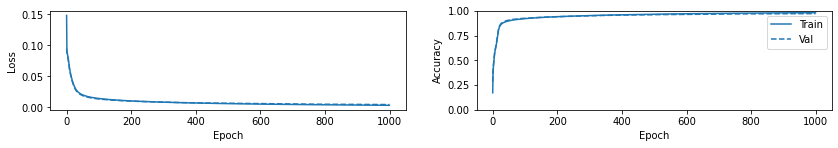

In [13]:
plot_metrics(history)

**TUTORIAL**

In [14]:
#머신 러닝용 dataset을 호출
mnist = tf.keras.datasets.mnist
# 당연히 해당 dataset이 어떻게 되어있는지는 알아야겠지.
# 해당 mnist dataset은 55000개의 training image, 5000개의 certification image -> x_train
# 해당 image에 매칭되는 학습 set label (=일종의 태그) -> y_train
# 테스트용 image 10000개 -> x_test
# 해당 image에 매칭되는 테스트 set label -> y_test
# Load and prepare the MNIST dataset. 
(x_train, y_train), (x_test, y_test) = mnist.load_data() # y_train, y_test : Label Encoding
x_train, x_test = x_train / 255.0, x_test / 255.0
# 픽셀은 0~255사이의 값이므로 255로 나눠서 각 pixel이 0~1의 값을 갖도록 함.

In [15]:
# Build the tf.keras.Sequential model by stacking layers.
# 선형 layer 모델 -> 층별로 layer를 쌓는다고 생각하면 됨!
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),#2D Layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',#정규화기
              loss='sparse_categorical_crossentropy', #손실함수
              metrics=['accuracy']) #기준리스트
# Train and evaluate model:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3969 - accuracy: 0.8804 - val_loss: 0.1277 - val_accuracy: 0.9583
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9655 - val_loss: 0.1161 - val_accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9742 - val_loss: 0.0715 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0674 - val_accuracy: 0.9783
Epoch 5/5
313/313 [==============================] - 0s 899us/step - loss: 0.0779 - accuracy: 0.9761


[0.0778837576508522, 0.9761000275611877]

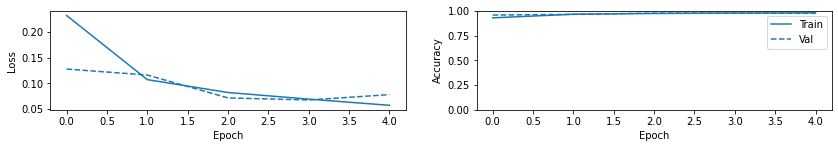

In [17]:
plot_metrics(history)

In [18]:
import numpy as np
predictions = model.predict(x_test)
print(np.argmax(predictions[2]))
print(y_test[2])

1
1
